In [1]:
import pylab
import pymoc
import xidplus
import numpy as np
%matplotlib inline

from astropy.io import fits
from astropy import wcs
from astropy.table import Table

/Users/pdh21/anaconda3/envs/xidplus/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


## Read Tables

In [2]:
new_cat=Table.read('./data/dmu26_XID+MIPS24_cat.fits')
new_cat['help_id']=list(map(str.strip,new_cat['help_id']))

In [3]:
new_cat

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,
str27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J100012.973+013237.564,150.05405287512485,1.5437677021173994,0.49646598,1.403249,0.124439694,0.004970582,0.0,0.9971175,1028.5126,0.0
HELP_J100012.882+013232.241,150.05367558945562,1.5422892067980194,0.5897039,1.6710175,0.15259618,0.004970582,0.0,0.9981769,1132.4781,0.0
HELP_J100011.891+013233.079,150.0495458070415,1.5425220007377403,0.29764035,0.7383409,0.089707546,0.004970582,0.0,1.001006,555.51874,0.0
HELP_J100012.253+013233.101,150.05105493739904,1.5425279615202658,0.26129657,0.7371073,0.06772871,0.004970582,0.0,1.0007117,868.1644,0.0
HELP_J100013.276+013236.500,150.05531667970394,1.5434722282893418,7.5753193,12.1057825,3.6927054,0.004970582,0.0,0.9965922,463.14423,0.0
HELP_J100012.506+013230.158,150.05210980277354,1.541710518644412,228.51671,232.93771,223.81583,0.004970582,0.0,0.99773717,508.09918,0.008
HELP_J100011.741+013235.358,150.04892090641232,1.5431548761371576,0.32918763,0.8483454,0.08682933,0.004970582,0.0,0.99793184,805.11176,0.0
HELP_J100012.331+013251.704,150.05137774947212,1.5476956426794155,0.37708926,1.0851567,0.10761273,0.004970582,0.0,0.99774724,421.197,0.0


## Look at Symmetry of PDFs to determine depth level of catalogue


4.987846


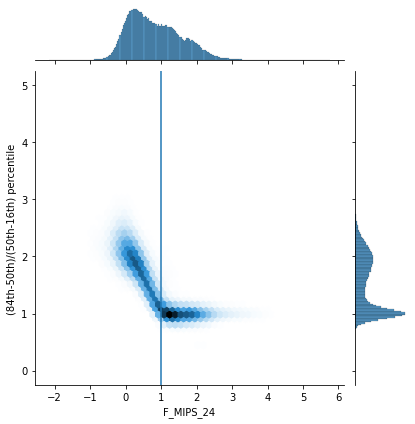

In [4]:
import seaborn as sns 
skew=(new_cat['FErr_MIPS_24_u']-new_cat['F_MIPS_24'])/(new_cat['F_MIPS_24']-new_cat['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(new_cat['F_MIPS_24'][use]),y=skew[use], kind='hex')
print(np.max(skew[use]))
g.ax_joint.axvline(x=1.0)

## Read in old catalogue and compare

In [5]:
old_cat=Table.read('./data/dmu26_XID+MIPS_COSMOS_20170213.fits')

In [6]:
old_cat['help_id']=list(map(str.strip,old_cat['help_id']))

In [7]:
old_cat

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24
,degrees,degrees,uJy,uJy,uJy,MJy / sr,MJy / sr,,,
str25,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J100019.68+012956.21,150.08198246138633,1.4989468814815219,1.7369019,4.0648217,0.45971057,-0.0073026787,5.1616803e-06,0.9998885,2000.0,0.0
HELP_J100022.32+012956.58,150.09301971863644,1.4990489627822126,0.534336,1.4047855,0.13813874,-0.0073026787,5.1616803e-06,1.0008082,2000.0,0.0
HELP_J100020.61+012956.18,150.0858593774897,1.498937737564352,0.42040396,1.0317029,0.11496559,-0.0073026787,5.1616803e-06,0.9993968,2000.0,0.0
HELP_J100019.96+012958.61,150.08314728761647,1.4996138585251841,0.81501496,2.1149762,0.22654483,-0.0073026787,5.1616803e-06,0.99840444,2000.0,0.0
HELP_J100024.06+012959.33,150.10025123058278,1.4998144435963177,1.5809047,3.9761553,0.41531694,-0.0073026787,5.1616803e-06,0.9988023,2000.0,1.0
HELP_J100023.65+013001.20,150.09852850532508,1.5003328816318249,0.8597981,2.1717572,0.25181934,-0.0073026787,5.1616803e-06,0.99857545,2000.0,0.0
HELP_J100021.22+012958.28,150.08841156572743,1.4995229715980405,1.8914821,4.1563582,0.5219331,-0.0073026787,5.1616803e-06,0.99866873,2000.0,0.0
HELP_J100022.87+013002.79,150.09530976030405,1.500773689476644,0.60483384,1.5343629,0.14979702,-0.0073026787,5.1616803e-06,0.99842775,2000.0,0.0


In [8]:
from astropy.coordinates import SkyCoord
from astropy import units as u
c = SkyCoord(ra=old_cat['RA'].data*u.degree, dec=old_cat['Dec'].data*u.degree)
catalog = SkyCoord(ra=new_cat['RA'].data*u.degree,dec=new_cat['Dec'].data*u.degree)
idx, d2d, d3d = c.match_to_catalog_sky(catalog)

In [9]:
max_sep=1.0*u.arcsec
sep_constraint = d2d < max_sep

In [10]:
c_matches = c[sep_constraint]
catalog_matches = catalog[idx[sep_constraint]]

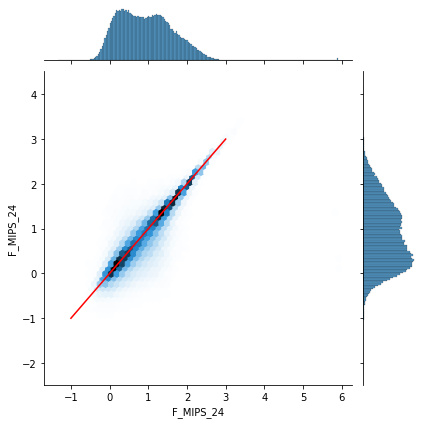

In [11]:
g=sns.jointplot(x=np.log10(old_cat[sep_constraint]['F_MIPS_24']),y=np.log10(new_cat[idx[sep_constraint]]['F_MIPS_24']),kind='hex')
g.ax_joint.plot(np.arange(-1,4),np.arange(-1,4),'r')

In [80]:
image_moc=pymoc.MOC()
image_moc.read('wp4_cosmos_mips24_map_v1.0-1-_MOC.fits')

In [85]:
from xidplus.moc_routines import check_in_moc

In [87]:
ind_moc=check_in_moc(new_cat['RA'],new_cat['Dec'],image_moc)

In [89]:
from astropy.table import Column
new_cat.add_column(Column(np.zeros(len(new_cat), dtype=bool),name='flag_mips_24'))

In [90]:
ind_cat=(new_cat['Pval_res_24']>0.5) | (new_cat['F_MIPS_24'] < 10.0)

In [91]:
new_cat['flag_mips_24'][ind_cat]=True


In [92]:
new_cat[ind_moc].write('./data/dmu26_XID+MIPS_COSMOS_20210716.fits', format='fits',overwrite=True)


In [96]:

ind_cat.sum()/len(ind_cat)

0.6362998769934612